# Labeled Faces In The Wild Deep Learning Classification


## Description

The LFW (Labeled Faces In The Wild) dataset is composed of 5479 clases (different persons) for more than 13000 images.

This code is a modified version from sklearn's website. I didn't resized the image to keep the best quality.

Orignal code: https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html


## Load dataset

In [26]:
from sklearn.datasets import fetch_lfw_people

# Load dataset in grayscale centered on the faces
lfw_people = fetch_lfw_people(min_faces_per_person=3, color=False, resize=1.0,
                              slice_=(slice(70, 195), slice(78, 172)), funneled=True)

X = lfw_people.data
y = lfw_people.target

target_names = lfw_people.target_names
n_classes = target_names.shape[0]
n_samples, h, w = lfw_people.images.shape

## Show images infos

In [27]:
print(f"Image dimensions: {w}x{h}x{1}")
print(f"Number of classes: {n_classes}")
print(f"Number of samples: {n_samples}")
print (target_names)

Image dimensions: 94x125x1
Number of classes: 901
Number of samples: 7606


## Split dataset


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scale dataset

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## PCA dimensions reduction (eigenfaces)

In [30]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

n_components = 300

pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

## Hyper-parameters tuning

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}

clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)

clf = clf.fit(X_train_pca, y_train)

print(f"Estimator: {clf.best_estimator_}")
print(f"With a score of {clf.best_score_}")

C:\Users\Quentin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Estimator: SVC(C=2469.063206728016, class_weight='balanced', gamma=0.00014819755498224772)
With a score of 0.25657583899148034


## Prediction on train

In [32]:
y_pred_train = clf.predict(X_train_pca)

## Prediction on test

In [33]:
y_pred_test = clf.predict(X_test_pca)

## Print scores

In [34]:
from sklearn.metrics import accuracy_score

def print_scores(y_train, y_test, y_pred_train, y_pred_test):
    print(f"Train accuracy: {accuracy_score(y_train, y_pred_train)}.")
    print(f"Test accuracy: {accuracy_score(y_test, y_pred_test)}.")

print_scores(y_train, y_test, y_pred_train, y_pred_test)

Train accuracy: 0.9998356344510191.
Test accuracy: 0.2726675427069645.


## Quantitive evaluation

In [35]:
"""
This cell is commented due to the test data who has not enough images to test every person,
 so it is impossible to evaluate some persons.
"""
# print("Predicting people's names on the test set")
# t0 = time()
# y_pred = clf.predict(X_test_pca)
# print("done in %0.3fs" % (time() - t0))
#
# print(classification_report(y_test, y_pred, target_names=target_names))
# ConfusionMatrixDisplay.from_estimator(
#     clf, X_test_pca, y_test, display_labels=target_names, xticks_rotation="vertical"
# )
# plt.tight_layout()
# plt.show()

## Dataset images

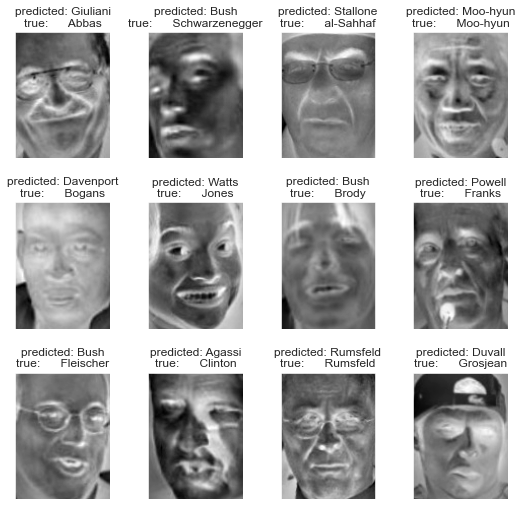

In [36]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray_r)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(" ", 1)[-1]
    true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
    return "predicted: %s\ntrue:      %s" % (pred_name, true_name)


prediction_titles = [
    title(y_pred_test, y_test, target_names, i) for i in range(y_pred_test.shape[0])
]

plot_gallery(X_test, prediction_titles, h, w)

## Dataset Eigenface images

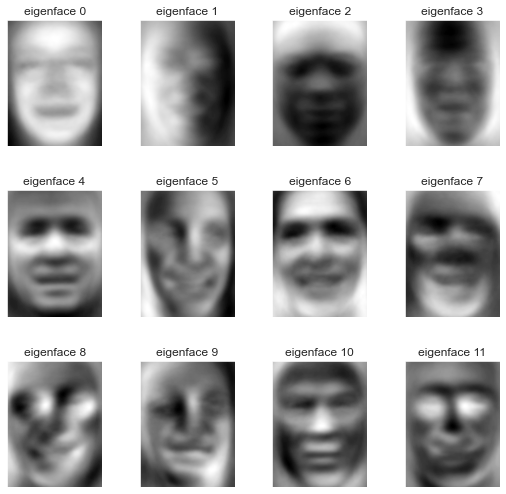

In [37]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

In [ ]:
# eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
# plot_gallery(eigenfaces, eigenface_titles, h, w)
#
# plt.show()


In [ ]:
# eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
# plot_gallery(eigenfaces, eigenface_titles, h, w)
#
# plt.show()


In [ ]:
# eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
# plot_gallery(eigenfaces, eigenface_titles, h, w)
#
# plt.show()


In [ ]:
# eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
# plot_gallery(eigenfaces, eigenface_titles, h, w)
#
# plt.show()


In [ ]:
# eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
# plot_gallery(eigenfaces, eigenface_titles, h, w)
#
# plt.show()


In [ ]:
# eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
# plot_gallery(eigenfaces, eigenface_titles, h, w)
#
# plt.show()


In [ ]:
# eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
# plot_gallery(eigenfaces, eigenface_titles, h, w)
#
# plt.show()


In [ ]:
# eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
# plot_gallery(eigenfaces, eigenface_titles, h, w)
#
# plt.show()


In [ ]:
# eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
# plot_gallery(eigenfaces, eigenface_titles, h, w)
#
# plt.show()


In [ ]:
# eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
# plot_gallery(eigenfaces, eigenface_titles, h, w)
#
# plt.show()


In [ ]:
# eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
# plot_gallery(eigenfaces, eigenface_titles, h, w)
#
# plt.show()
